In [103]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [99]:
url <- "https://github.com/TheABoss/DSCI-100-2023T2-Project-Group-001/raw/main/data/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
file <- download.file(url,destfile = "datafile.xls")

know_1 <- read_excel("datafile.xls",sheet = 2,range = "A1:F259")
know_2 <- read_excel("datafile.xls",sheet = 3,range = "A1:F146")
know_raw <- full_join(know_1,know_2)

Joining with `by = join_by(STG, SCG, STR, LPR, PEG, UNS)`


In [102]:
cc <- know_1 |>
        group_by(UNS) |>
        summarise(count = n())

Joining with `by = join_by(UNS)`
`summarise()` has grouped output by 'UNS'. You can override using the `.groups`
argument.


UNS,avgSTG,avgSCG,avgSTR,avgLPR,avgPEG,count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
High,0.4216508,0.4231905,0.5016667,0.5012698,0.77253968,63
Middle,0.3999773,0.3679205,0.5068182,0.3428409,0.54238636,88
Low,0.3211446,0.3370000,0.4307229,0.4973494,0.23762651,83
very_low,0.3057917,0.1981250,0.3662500,0.3587500,0.09083333,24


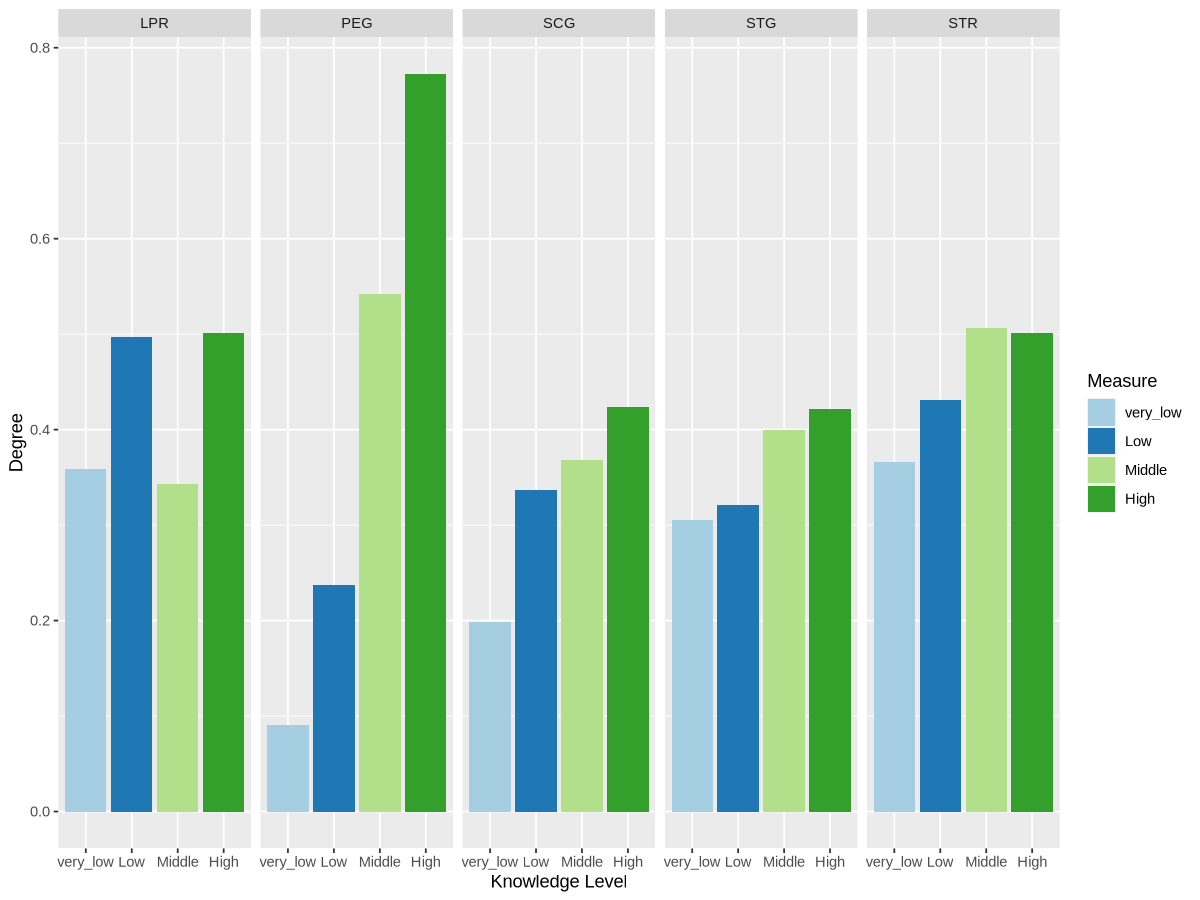

In [100]:
avg <- know_1 |>
            group_by(UNS) |>
            summarize(avgSTG = mean(STG),
                      avgSCG = mean(SCG),
                      avgSTR = mean(STR),
                      avgLPR = mean(LPR),
                      avgPEG = mean(PEG)) |>
            arrange(desc(avgSTG))


maintbl <- avg |>
        full_join(cc)

plot1 <- ggplot(avg, aes(x = fct_reorder(UNS,avgSTG,.desc = FALSE), y = avgSTG, fill = UNS)) +
                geom_bar(stat = "identity",position = "dodge") +
                labs(x = "Average STG", y = "Degree", fill = "UNS")

reorder <- know_1 |>
            pivot_longer(STG:PEG, names_to = "type", values_to = "value") |>
            group_by(UNS,type) |>
            summarise(avg = mean(value),
                      sd = sd(value))

reorder$UNS <- factor(reorder$UNS, levels = c("very_low", "Low", "Middle", "High"))

options(repr.plot.width = 10, repr.plot.height = 7.5)
mainplot <- ggplot(reorder,aes(x = UNS, y = avg, fill = UNS)) +
                geom_bar(stat = "identity",position = "dodge") +
                labs(x = "Knowledge Level", y = "Degree", fill = "Measure") +
                facet_grid(. ~ type) + 
                scale_fill_brewer(palette = "Paired")
                                    #Palettes that seem good: Reds, Paired

mainplotwerrorbars <- mainplot + geom_errorbar(aes(x = UNS, ymin = avg - sd, ymax = avg + sd), width = 0.4, colour = "black", alpha = 0.9, size = 1) 

#avg
#know_raw
#nna
#reorder
maintbl
mainplot
#mainplotwerrorbars